In [3]:
import json
import glob
import pandas as pd
import sqlite3
import os
import numpy as np

def load_spotify_data():
    path = "/Users/andrewedwards/Desktop/spotify-history/venv/bobby spotify"
    files = glob.glob(os.path.join(path, "Streaming_History_Audio_*.json"))
    
    print("Files found:", files)
    all_data = []
    
    # Read first file and print structure
    if files:
        with open(files[0], 'r') as file:
            data = json.load(file)
            print("\nFirst record structure:")
            print(json.dumps(data[0], indent=2))
    
    for file_path in files:
        with open(file_path, 'r') as file:
            data = json.load(file)
            all_data.extend(data)
    
    df = pd.DataFrame(all_data)
    print("\nColumns in DataFrame:", df.columns)
    
    df['ts'] = pd.to_datetime(df['ts'])
    df['year'] = df['ts'].dt.year
    df['month'] = df['ts'].dt.month
    df['day'] = df['ts'].dt.day
    df['hour'] = df['ts'].dt.hour
    df['minutes_played'] = df['ms_played'] / 60000
    
    return df

df = load_spotify_data()
conn = sqlite3.connect('spotify_history.db')
df.to_sql('listening_history', conn, if_exists='replace', index=False)
conn.close()

print("Database created successfully!")

Files found: ['/Users/andrewedwards/Desktop/spotify-history/venv/bobby spotify/Streaming_History_Audio_2012-2014_0.json', '/Users/andrewedwards/Desktop/spotify-history/venv/bobby spotify/Streaming_History_Audio_2015-2016_2.json', '/Users/andrewedwards/Desktop/spotify-history/venv/bobby spotify/Streaming_History_Audio_2021-2022_8.json', '/Users/andrewedwards/Desktop/spotify-history/venv/bobby spotify/Streaming_History_Audio_2017-2019_4.json', '/Users/andrewedwards/Desktop/spotify-history/venv/bobby spotify/Streaming_History_Audio_2019_5.json', '/Users/andrewedwards/Desktop/spotify-history/venv/bobby spotify/Streaming_History_Audio_2024-2025_11.json', '/Users/andrewedwards/Desktop/spotify-history/venv/bobby spotify/Streaming_History_Audio_2023-2024_10.json', '/Users/andrewedwards/Desktop/spotify-history/venv/bobby spotify/Streaming_History_Audio_2019-2020_6.json', '/Users/andrewedwards/Desktop/spotify-history/venv/bobby spotify/Streaming_History_Audio_2020-2021_7.json', '/Users/andrewedw

In [4]:
conn = sqlite3.connect('spotify_history.db')
query = """
SELECT 
    master_metadata_album_artist_name as artist,
    COUNT(*) as play_count,
    SUM(minutes_played) as total_minutes
FROM listening_history
GROUP BY artist
ORDER BY play_count DESC
LIMIT 10
"""
pd.read_sql_query(query, conn)

,artist,play_count,total_minutes
0,Alex G,6736,13680.944717
1,Modest Mouse,4034,15112.902583
2,The Beatles,3664,6605.423833
3,Pinegrove,2423,5911.694433
4,The Cure,2378,6746.392417
5,Elliott Smith,2220,5617.371083
6,Ariel Pink,1983,5541.932917
7,None,1884,39655.826567
8,Current Joys,1829,5176.109450
9,Glass Animals,1617,3875.824833


In [5]:
conn = sqlite3.connect('spotify_history.db')

query = """
WITH artist_stats AS (
    SELECT 
        master_metadata_album_artist_name as artist,
        master_metadata_track_name as track,
        COUNT(*) as play_count,
        SUM(minutes_played) as total_minutes,
        AVG(minutes_played) as avg_minutes
    FROM listening_history
    WHERE master_metadata_album_artist_name IS NOT NULL
    GROUP BY artist, track
)
SELECT 
    artist,
    track,
    play_count,
    ROUND(total_minutes, 2) as total_minutes,
    ROUND(avg_minutes, 2) as avg_minutes
FROM artist_stats
ORDER BY play_count DESC
LIMIT 20;
"""

print('\nTop Songs by Play Count')
pd.read_sql_query(query, conn)


Top Songs by Play Count


,artist,track,play_count,total_minutes,avg_minutes
0,American Football,Never Meant,252,868.37,3.45
1,Brave Little Abacus,Pile! No Pile! Pile!,209,910.17,4.35
2,Clap Your Hands Say Yeah,The Skin of My Yellow Country Teeth,192,679.80,3.54
3,Kurt Vile,Girl Called Alex,189,724.65,3.83
4,Built To Spill,Carry the Zero,186,865.89,4.66
5,Current Joys,Anymore,186,331.75,1.78
6,Dirty Gold,California Sunrise,166,385.48,2.32
7,The Shins,New Slang,166,387.09,2.33
8,Neutral Milk Hotel,Two-Headed Boy Pt. 2,164,621.63,3.79
9,French Kicks,Abandon,162,538.59,3.32


In [6]:
conn = sqlite3.connect('spotify_history.db')

query = """
WITH artist_stats AS (
    SELECT 
        master_metadata_album_artist_name as artist,
        master_metadata_track_name as track,
        COUNT(*) as play_count,
        SUM(minutes_played) as total_minutes,
        AVG(minutes_played) as avg_minutes
    FROM listening_history
    WHERE master_metadata_album_artist_name IS NOT NULL
    GROUP BY artist, track
)
SELECT 
    artist,
    track,
    play_count,
    ROUND(total_minutes, 2) as total_minutes,
    ROUND(avg_minutes, 2) as avg_minutes
FROM artist_stats
ORDER BY total_minutes DESC
LIMIT 20;
"""

print('\nTop Songs by Minutes Listened')
pd.read_sql_query(query, conn)


Top Songs by Minutes Listened


,artist,track,play_count,total_minutes,avg_minutes
0,Kurt Vile,Wakin on a Pretty Day,149,986.64,6.62
1,Brave Little Abacus,I See It Too,120,971.04,8.09
2,Brave Little Abacus,Pile! No Pile! Pile!,209,910.17,4.35
3,American Football,Never Meant,252,868.37,3.45
4,Built To Spill,Carry the Zero,186,865.89,4.66
5,Beat Happening,Godsend,110,854.19,7.77
6,Deerhunter,He Would Have Laughed,127,742.33,5.85
7,Kurt Vile,Girl Called Alex,189,724.65,3.83
8,Clap Your Hands Say Yeah,The Skin of My Yellow Country Teeth,192,679.80,3.54
9,Neutral Milk Hotel,Two-Headed Boy Pt. 2,164,621.63,3.79


In [7]:
query = """
SELECT 
   year,
   COUNT(*) as total_streams,
   ROUND(SUM(minutes_played), 2) as total_minutes,
   COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks
FROM listening_history
GROUP BY year 
ORDER BY total_streams DESC limit 10;
"""

print('\nYears by Total Streams')
pd.read_sql_query(query, conn)


Years by Total Streams


,year,total_streams,total_minutes,unique_artists,unique_tracks
0,2019,26055,57268.33,1267,3730
1,2015,19712,42729.43,865,2195
2,2020,19180,47393.48,1511,3992
3,2023,17049,51896.07,1964,4906
4,2021,16762,55598.98,1537,3999
5,2022,14587,48488.11,1658,4113
6,2017,14100,23310.46,951,2551
7,2024,13893,47125.92,1777,3935
8,2014,12292,28341.69,602,1682
9,2016,11953,24325.43,795,2024


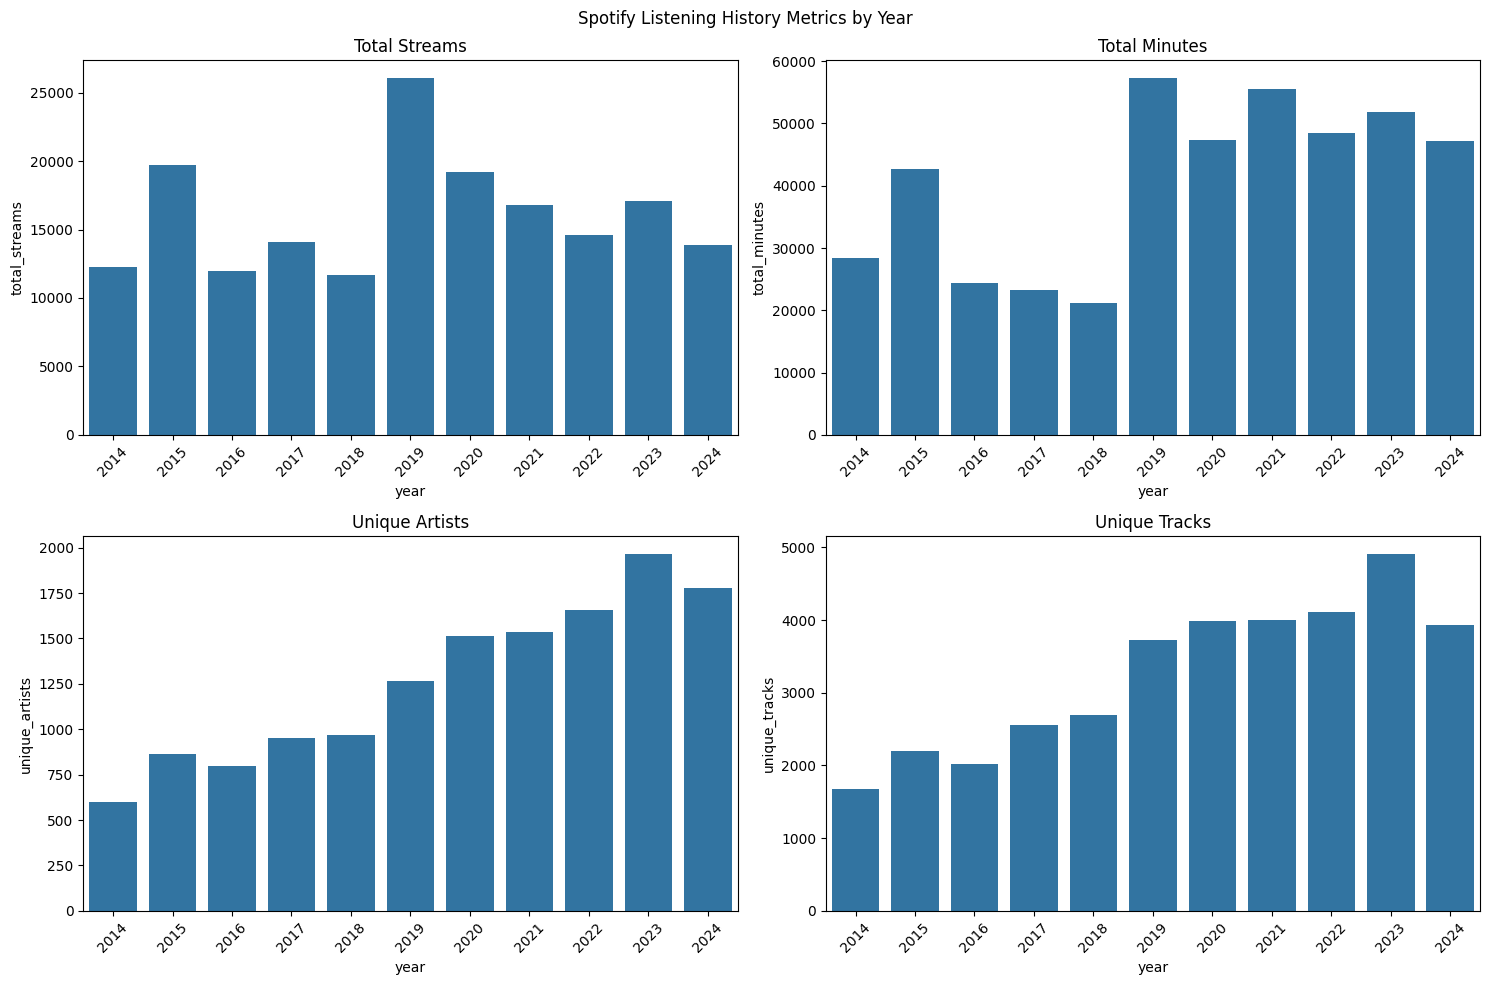

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

query = """
SELECT year, total_streams, total_minutes, unique_artists, unique_tracks
FROM (
   SELECT 
       year,
       COUNT(*) as total_streams,
       ROUND(SUM(minutes_played), 2) as total_minutes,
       COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks
   FROM listening_history
   WHERE year > 2013 AND year < 2025
   GROUP BY year
) data
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Spotify Listening History Metrics by Year')

metrics = ['total_streams', 'total_minutes', 'unique_artists', 'unique_tracks']
for i, metric in enumerate(metrics):
   ax = axes[i//2, i%2]
   sns.barplot(data=df, x='year', y=metric, ax=ax)
   ax.set_title(metric.replace('_', ' ').title())
   ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

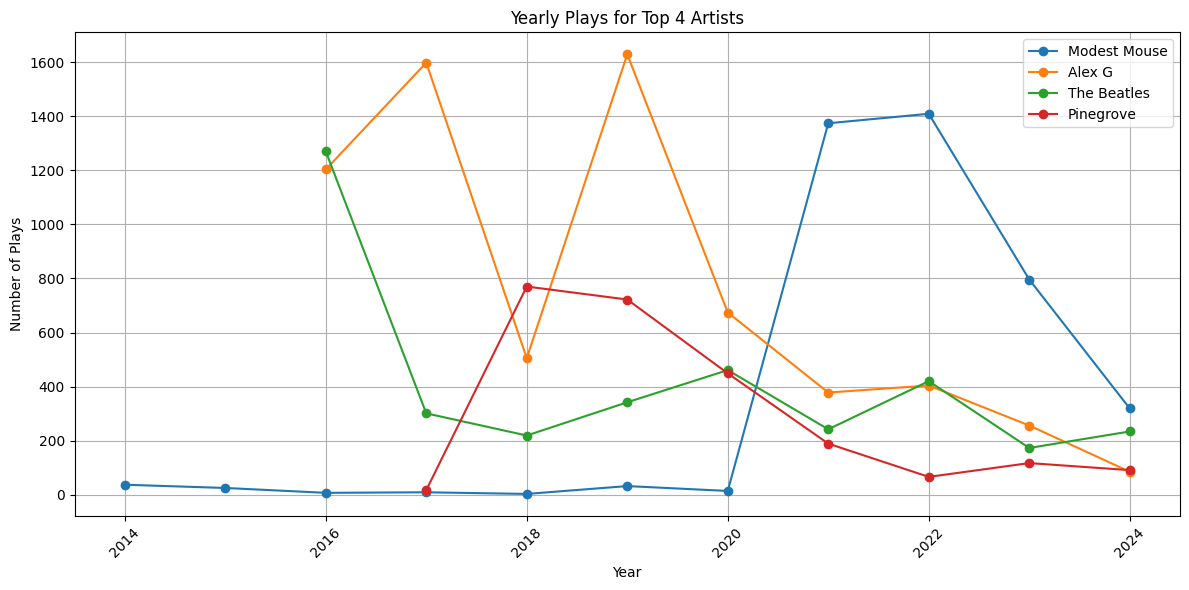

In [9]:
query = """
WITH artist_counts AS (
   SELECT 
       year,
       master_metadata_album_artist_name,
       COUNT(*) as plays
   FROM listening_history 
   WHERE year > 2013 AND year < 2025
   GROUP BY year, master_metadata_album_artist_name
)
SELECT year, master_metadata_album_artist_name, plays
FROM artist_counts
WHERE master_metadata_album_artist_name IN (
   SELECT master_metadata_album_artist_name 
   FROM listening_history
   GROUP BY master_metadata_album_artist_name
   ORDER BY COUNT(*) DESC
   LIMIT 4
)
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for artist in df['master_metadata_album_artist_name'].unique():
   artist_data = df[df['master_metadata_album_artist_name'] == artist]
   plt.plot(artist_data['year'], artist_data['plays'], marker='o', label=artist)

plt.title('Yearly Plays for Top 4 Artists')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

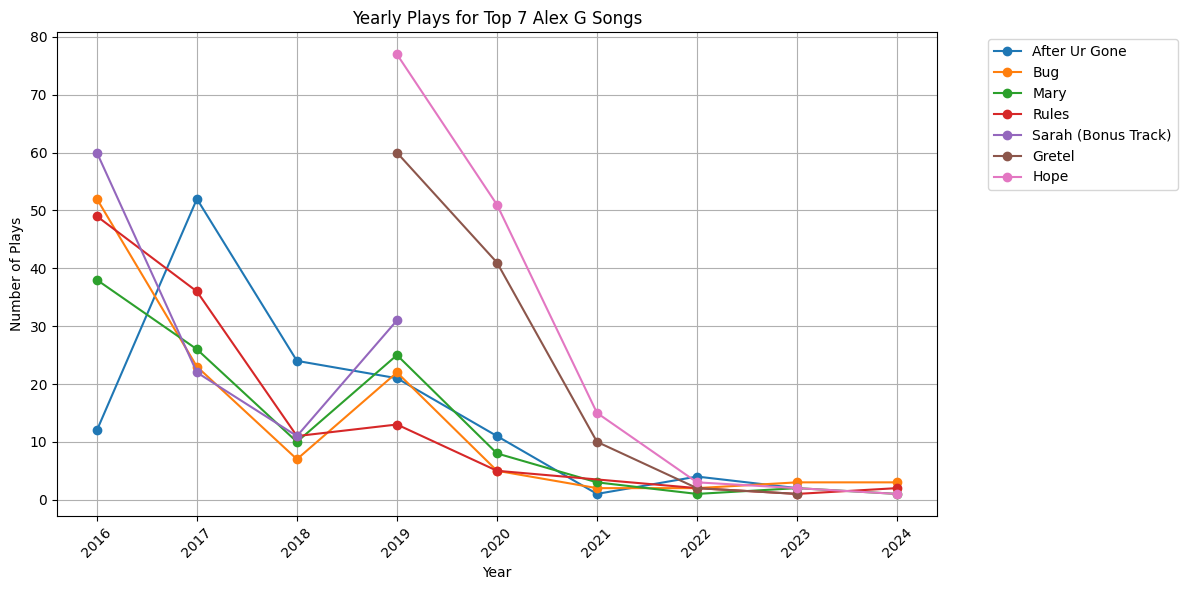

In [46]:
query = """
SELECT 
   master_metadata_track_name,
   year,
   COUNT(*) as plays
FROM listening_history 
WHERE master_metadata_album_artist_name = 'Alex G'
   AND year > 2013 AND year < 2025
GROUP BY master_metadata_track_name, year
HAVING master_metadata_track_name IN (
   SELECT master_metadata_track_name
   FROM listening_history
   WHERE master_metadata_album_artist_name = 'Alex G'
   GROUP BY master_metadata_track_name
   ORDER BY COUNT(*) DESC
   LIMIT 7
)
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for song in df['master_metadata_track_name'].unique():
   song_data = df[df['master_metadata_track_name'] == song]
   plt.plot(song_data['year'], song_data['plays'], marker='o', label=song)

plt.title('Yearly Plays for Top 7 Alex G Songs')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

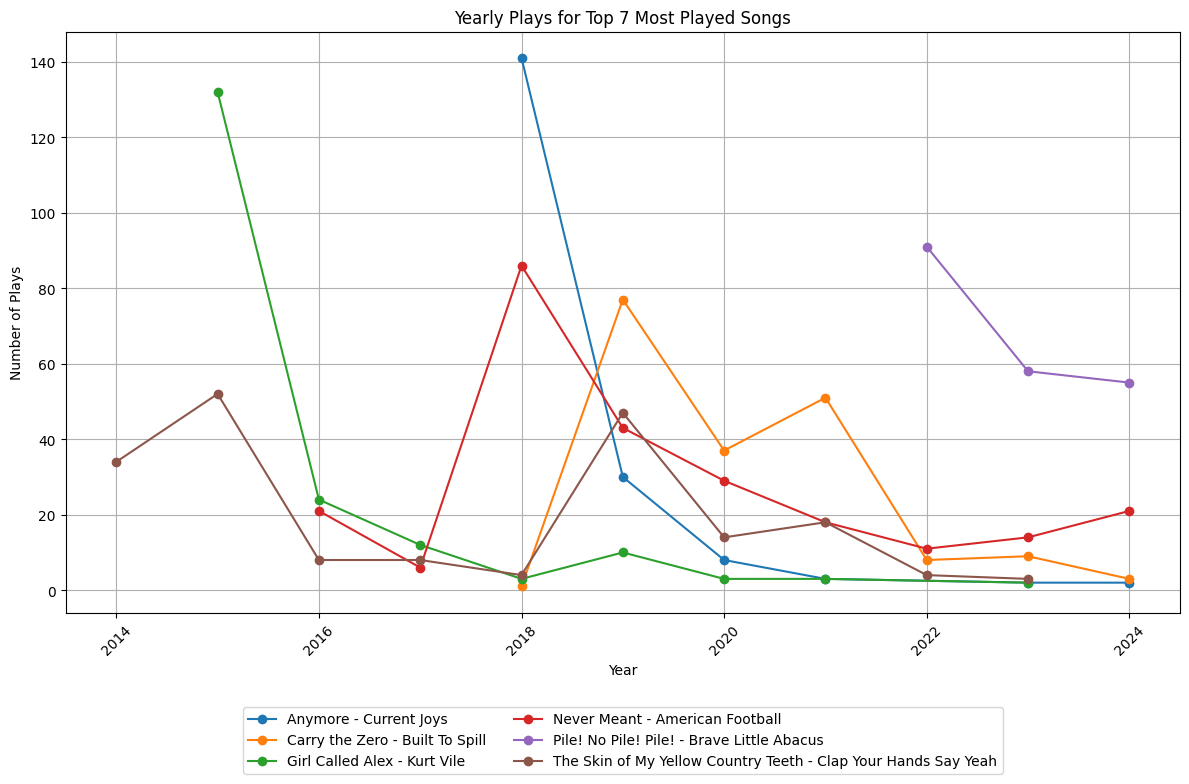

In [47]:
query = """
WITH top_songs AS (
   SELECT 
       master_metadata_track_name as track,
       master_metadata_album_artist_name as artist,
       year,
       COUNT(*) as plays
   FROM listening_history 
   WHERE year > 2013 AND year < 2025
   GROUP BY track, artist, year
   HAVING (track, artist) IN (
       SELECT 
           master_metadata_track_name,
           master_metadata_album_artist_name
       FROM listening_history
       GROUP BY master_metadata_track_name, master_metadata_album_artist_name
       ORDER BY COUNT(*) DESC
       LIMIT 7
   )
)
SELECT * FROM top_songs
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 8))  # Increased height to accommodate legend
for song in df.groupby(['track', 'artist']):
   song_data = song[1]
   label = f"{song[0][0]} - {song[0][1]}"
   plt.plot(song_data['year'], song_data['plays'], marker='o', label=label)

plt.title('Yearly Plays for Top 7 Most Played Songs')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

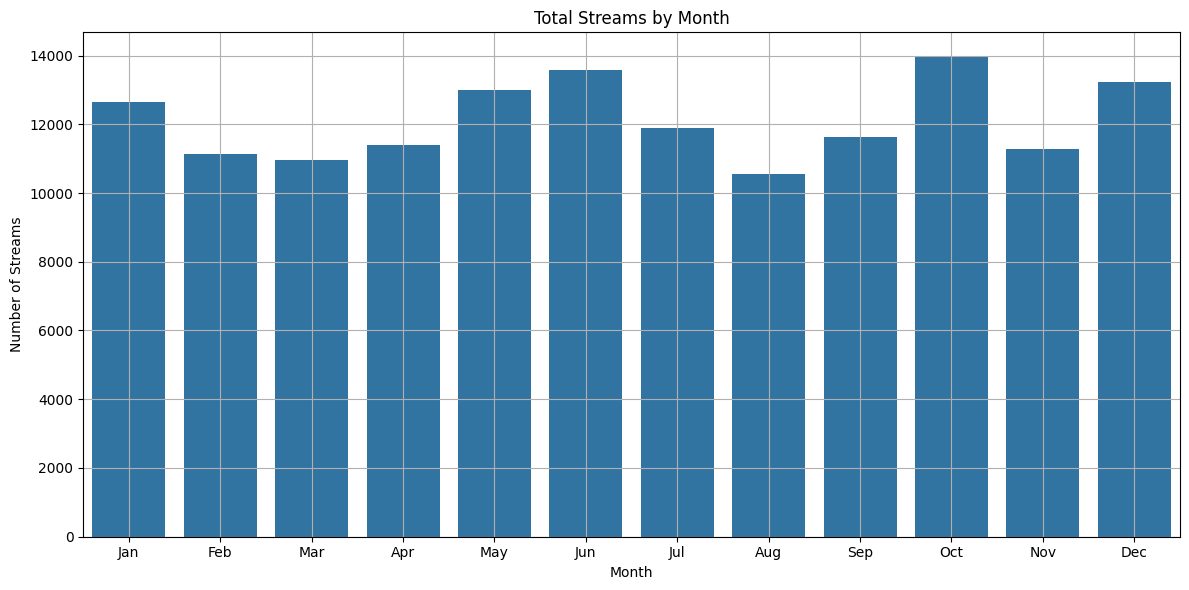

In [12]:
query = """
SELECT 
   month,
   COUNT(*) as total_streams
FROM listening_history
WHERE year > 2015 AND year < 2025
GROUP BY month
ORDER BY month;
"""

df = pd.read_sql_query(query, conn)

# Add month names
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month_name'] = df['month'].map(month_names)

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month_name', y='total_streams')
plt.title('Total Streams by Month')
plt.xlabel('Month')
plt.ylabel('Number of Streams')
plt.grid(True)
plt.tight_layout()
plt.show()

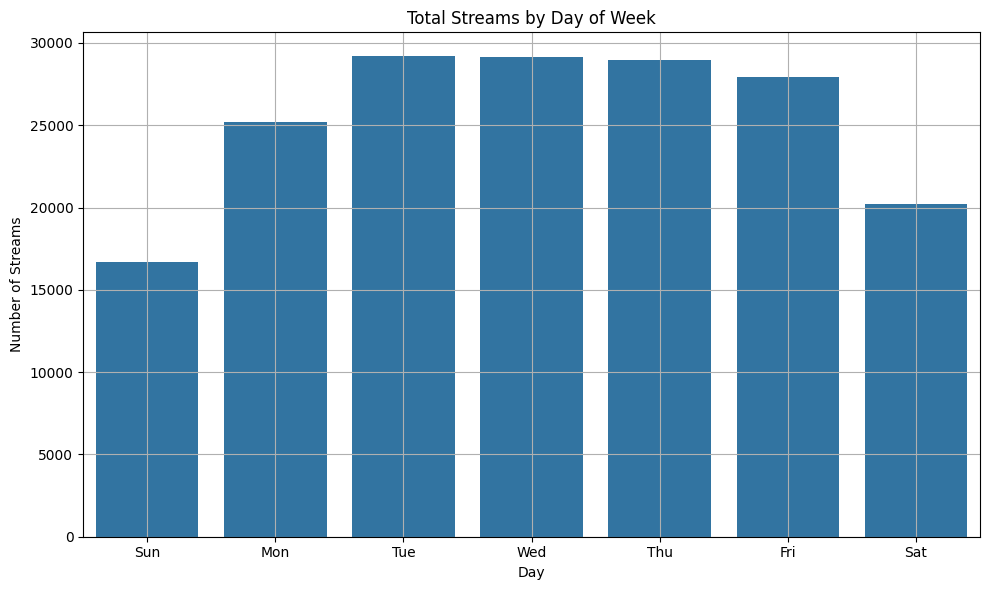

In [13]:
query = """
SELECT 
   CAST(strftime('%w', ts) AS INTEGER) as day_num,
   COUNT(*) as total_streams
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY day_num
ORDER BY day_num;
"""

df = pd.read_sql_query(query, conn)

day_names = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
df['day_name'] = df['day_num'].map(day_names)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_name', y='total_streams')
plt.title('Total Streams by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Streams')
plt.grid(True)
plt.tight_layout()
plt.show()

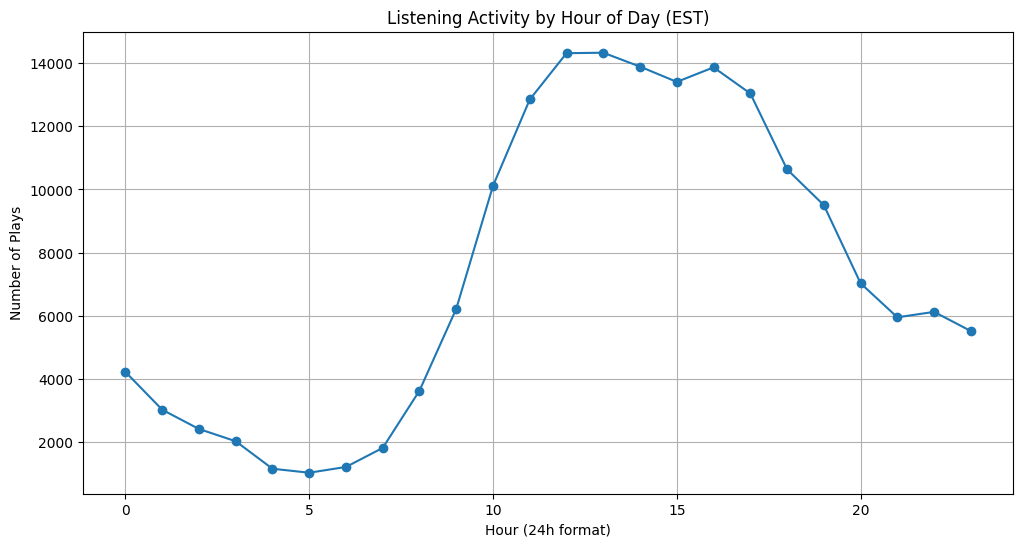

In [14]:
query = """
SELECT 
   CAST(strftime('%H', datetime(ts, '-5 hours')) AS INTEGER) as hour,
   COUNT(*) as plays,
   ROUND(SUM(minutes_played),2) as total_minutes
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY hour
ORDER BY hour;
"""

df = pd.read_sql_query(query, conn)
plt.figure(figsize=(12, 6))
plt.plot(df['hour'], df['plays'], marker='o')
plt.title('Listening Activity by Hour of Day (EST)')
plt.xlabel('Hour (24h format)')
plt.ylabel('Number of Plays')
plt.grid(True)
plt.show()

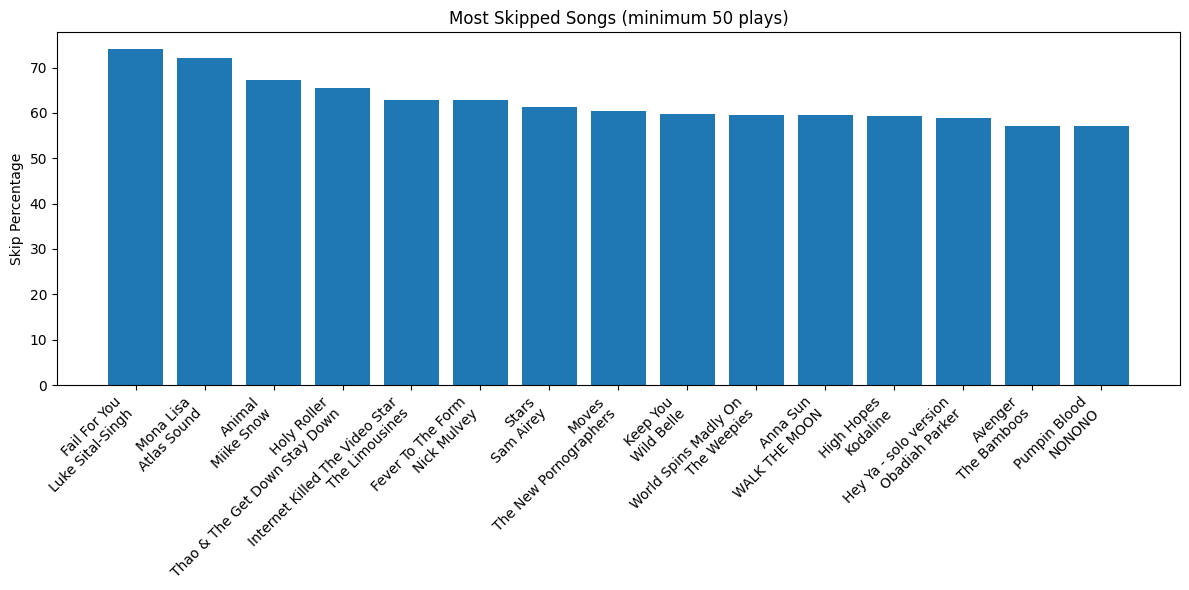

In [15]:
query = """
SELECT 
   master_metadata_track_name as track,
   master_metadata_album_artist_name as artist,
   COUNT(*) as total_plays,
   SUM(CASE WHEN skipped = 1 THEN 1 ELSE 0 END) as skips,
   ROUND(CAST(SUM(CASE WHEN skipped = 1 THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*) * 100, 2) as skip_percentage
FROM listening_history
GROUP BY track, artist
HAVING total_plays > 50
ORDER BY skip_percentage DESC
LIMIT 15;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(df)), df['skip_percentage'])
plt.xticks(range(len(df)), [f"{df['track'].iloc[i]}\n{df['artist'].iloc[i]}" for i in range(len(df))], rotation=45, ha='right')
plt.title('Most Skipped Songs (minimum 50 plays)')
plt.ylabel('Skip Percentage')
plt.tight_layout()
plt.show()

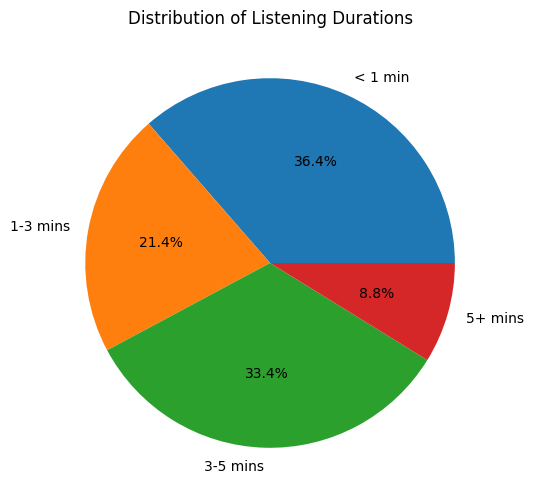

In [16]:
query = """
SELECT 
   CASE 
       WHEN minutes_played < 1 THEN '< 1 min'
       WHEN minutes_played < 3 THEN '1-3 mins'
       WHEN minutes_played < 5 THEN '3-5 mins'
       ELSE '5+ mins'
   END as duration_bucket,
   COUNT(*) as count
FROM listening_history
GROUP BY duration_bucket
ORDER BY 
   CASE duration_bucket
       WHEN '< 1 min' THEN 1
       WHEN '1-3 mins' THEN 2
       WHEN '3-5 mins' THEN 3
       ELSE 4
   END;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.pie(df['count'], labels=df['duration_bucket'], autopct='%1.1f%%')
plt.title('Distribution of Listening Durations')
plt.show()

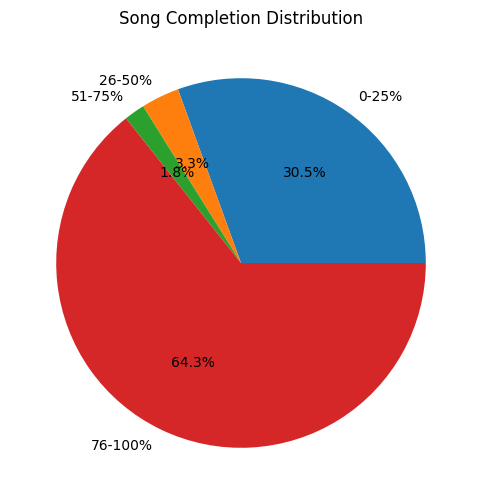

In [17]:
query = """
SELECT 
   CASE 
       WHEN CAST(ms_played AS FLOAT) / 60000 <= 0.25 THEN '0-25%'
       WHEN CAST(ms_played AS FLOAT) / 60000 <= 0.50 THEN '26-50%'
       WHEN CAST(ms_played AS FLOAT) / 60000 <= 0.75 THEN '51-75%'
       ELSE '76-100%'
   END as completion_bucket,
   COUNT(*) as count
FROM listening_history
WHERE master_metadata_track_name IS NOT NULL
   AND year > 2013 AND year < 2025
GROUP BY completion_bucket
ORDER BY completion_bucket;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.pie(df['count'], labels=df['completion_bucket'], autopct='%1.1f%%')
plt.title('Song Completion Distribution')
plt.show()

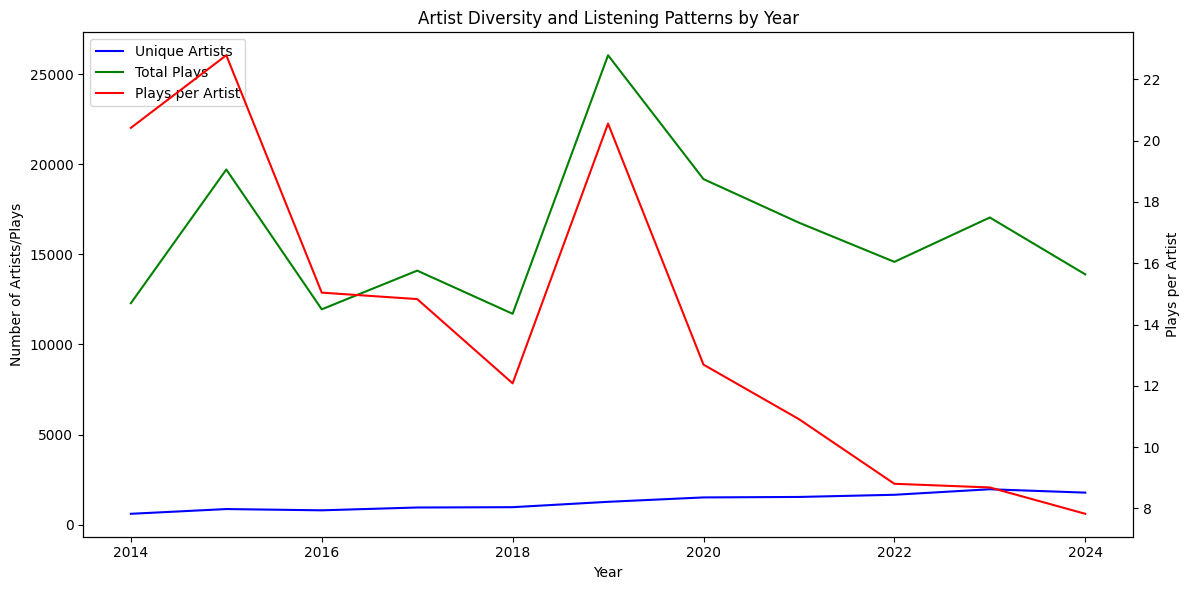

In [18]:
query = """
SELECT 
   year,
   COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
   COUNT(*) as total_plays,
   ROUND(CAST(COUNT(*) AS FLOAT) / COUNT(DISTINCT master_metadata_album_artist_name), 2) as plays_per_artist
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY year
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Artists/Plays')
ln1 = ax1.plot(df['year'], df['unique_artists'], 'b-', label='Unique Artists')
ln2 = ax1.plot(df['year'], df['total_plays'], 'g-', label='Total Plays')

ax2 = ax1.twinx()
ax2.set_ylabel('Plays per Artist')
ln3 = ax2.plot(df['year'], df['plays_per_artist'], 'r-', label='Plays per Artist')

lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

plt.title('Artist Diversity and Listening Patterns by Year')
plt.tight_layout()
plt.show()

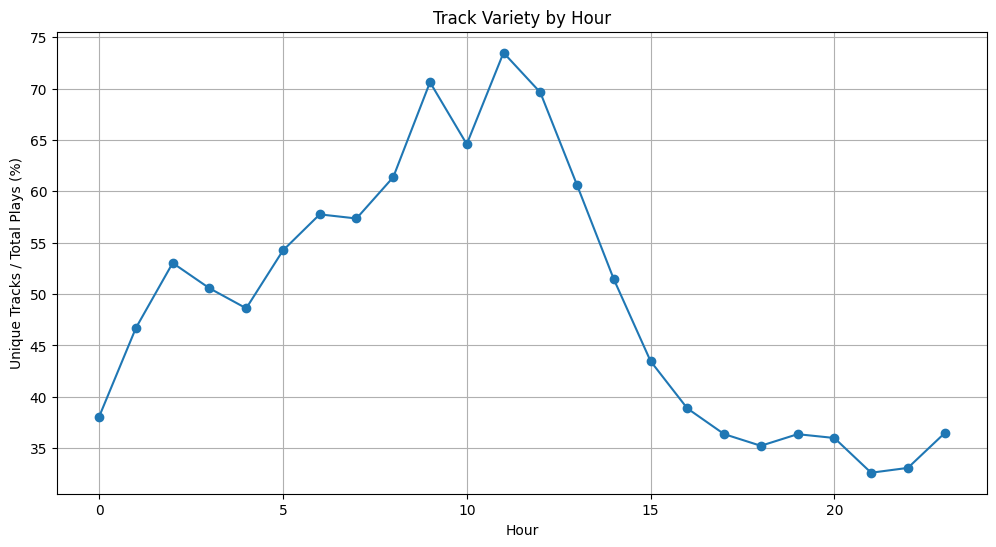

In [19]:
query = """
WITH hourly_unique AS (
    SELECT 
        hour,
        COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
        COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
        COUNT(*) as total_plays
    FROM listening_history
    WHERE year > 2013 AND year < 2025
    GROUP BY hour
)
SELECT 
    hour,
    unique_tracks,
    unique_artists,
    ROUND(CAST(unique_tracks AS FLOAT) / total_plays * 100, 2) as track_variety_score
FROM hourly_unique
ORDER BY hour;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.plot(df['hour'], df['track_variety_score'], marker='o')
plt.title('Track Variety by Hour')
plt.xlabel('Hour')
plt.ylabel('Unique Tracks / Total Plays (%)')
plt.grid(True)
plt.show()

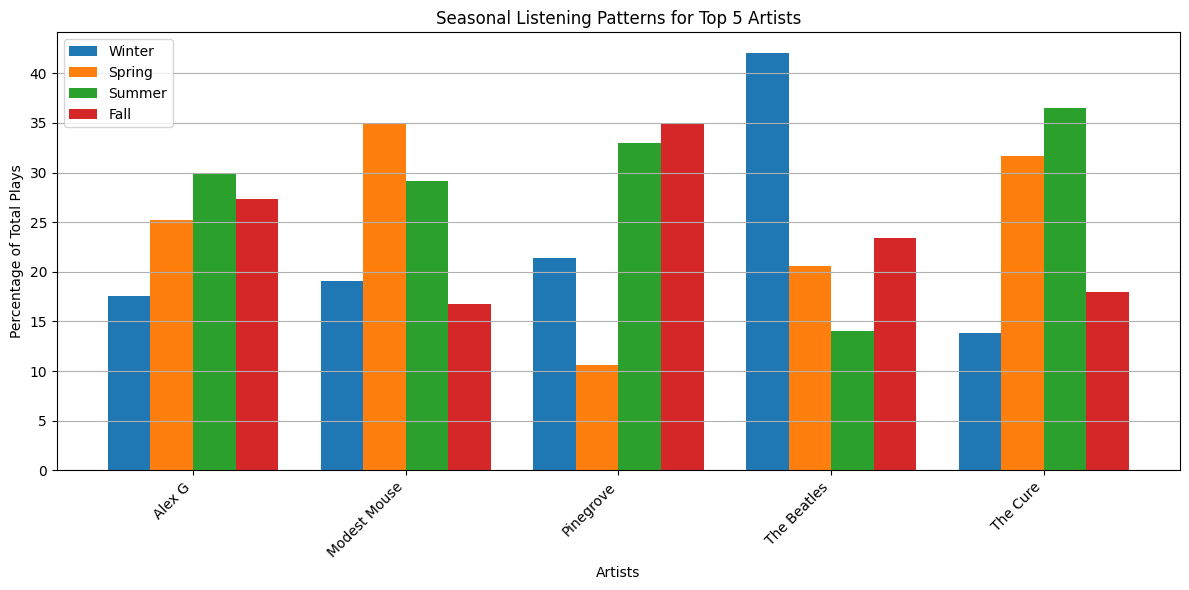

In [20]:
query = """
WITH seasonal_plays AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       CASE 
           WHEN month IN (12,1,2) THEN 'Winter'
           WHEN month IN (3,4,5) THEN 'Spring'
           WHEN month IN (6,7,8) THEN 'Summer'
           ELSE 'Fall'
       END as season,
       COUNT(*) as plays
   FROM listening_history
   WHERE year > 2013 AND year < 2025
   GROUP BY artist, season
   HAVING artist IN (
       SELECT master_metadata_album_artist_name
       FROM listening_history
       GROUP BY master_metadata_album_artist_name
       HAVING COUNT(*) > 200
       ORDER BY COUNT(*) DESC
       LIMIT 5
   )
)
SELECT 
   artist,
   season,
   plays,
   ROUND(plays * 100.0 / SUM(plays) OVER (PARTITION BY artist), 2) as season_percentage
FROM seasonal_plays
ORDER BY artist, season;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
artists = df['artist'].unique()
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
x = np.arange(len(artists))
width = 0.2

for i, season in enumerate(seasons):
   season_data = df[df['season'] == season]
   plt.bar(x + i*width, season_data['season_percentage'], width, label=season)

plt.xlabel('Artists')
plt.ylabel('Percentage of Total Plays')
plt.title('Seasonal Listening Patterns for Top 5 Artists')
plt.xticks(x + width*1.5, artists, rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show() 

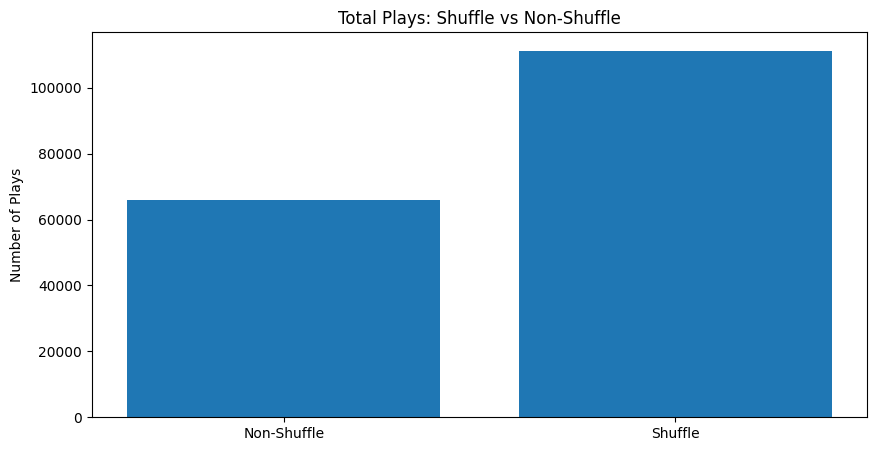

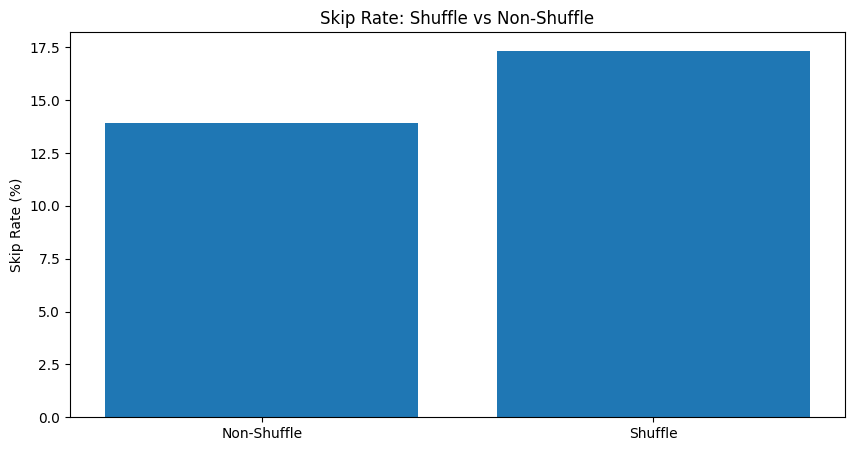

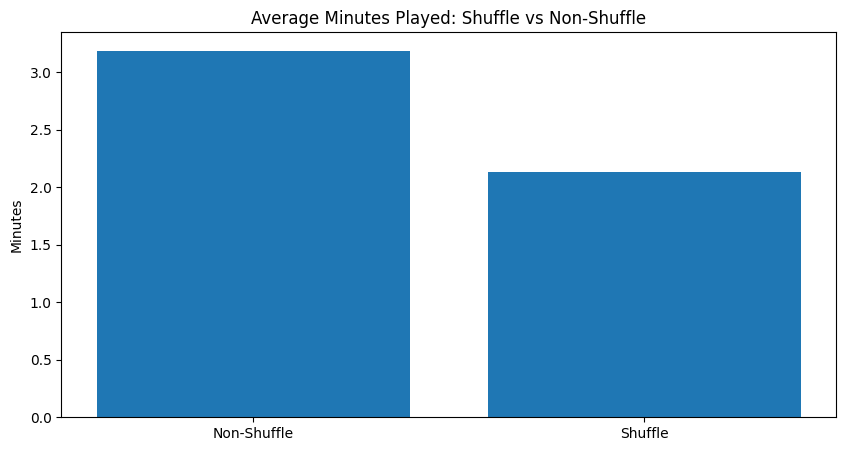

In [21]:
query = """
SELECT 
    CASE WHEN shuffle THEN 'Shuffle' ELSE 'Non-Shuffle' END as play_mode,
    COUNT(*) as plays,
    ROUND(AVG(CASE WHEN skipped THEN 1 ELSE 0 END) * 100, 2) as skip_rate,
    ROUND(AVG(minutes_played), 2) as avg_minutes_played
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY shuffle;
"""

df = pd.read_sql_query(query, conn)

# Simple bar plot comparing total plays
plt.figure(figsize=(10, 5))
plt.bar(df['play_mode'], df['plays'])
plt.title('Total Plays: Shuffle vs Non-Shuffle')
plt.ylabel('Number of Plays')
plt.show()

# Skip rate comparison
plt.figure(figsize=(10, 5))
plt.bar(df['play_mode'], df['skip_rate'])
plt.title('Skip Rate: Shuffle vs Non-Shuffle')
plt.ylabel('Skip Rate (%)')
plt.show()

# Average listening time
plt.figure(figsize=(10, 5))
plt.bar(df['play_mode'], df['avg_minutes_played'])
plt.title('Average Minutes Played: Shuffle vs Non-Shuffle')
plt.ylabel('Minutes')
plt.show()

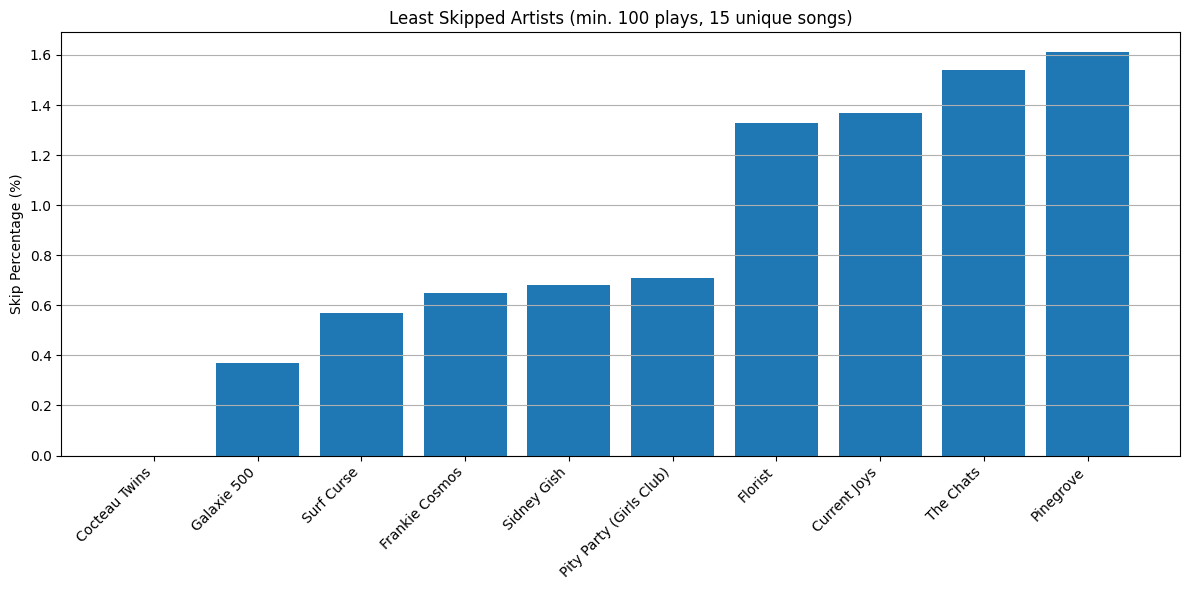

In [22]:
query = """
WITH artist_song_counts AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       COUNT(DISTINCT master_metadata_track_name) as unique_songs
   FROM listening_history
   GROUP BY artist
)
SELECT 
   h.master_metadata_album_artist_name as artist,
   COUNT(*) as total_plays,
   SUM(CASE WHEN skipped THEN 1 ELSE 0 END) as total_skips,
   ROUND(CAST(SUM(CASE WHEN skipped THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*) * 100, 2) as skip_percentage,
   asc.unique_songs
FROM listening_history h
JOIN artist_song_counts asc ON h.master_metadata_album_artist_name = asc.artist
WHERE year > 2013 AND year < 2025
   AND h.master_metadata_album_artist_name IS NOT NULL
GROUP BY h.master_metadata_album_artist_name
HAVING total_plays > 100 AND asc.unique_songs >= 15
ORDER BY skip_percentage ASC
LIMIT 10;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(df)), df['skip_percentage'])
plt.xticks(range(len(df)), df['artist'], rotation=45, ha='right')
plt.title('Least Skipped Artists (min. 100 plays, 15 unique songs)')
plt.ylabel('Skip Percentage (%)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

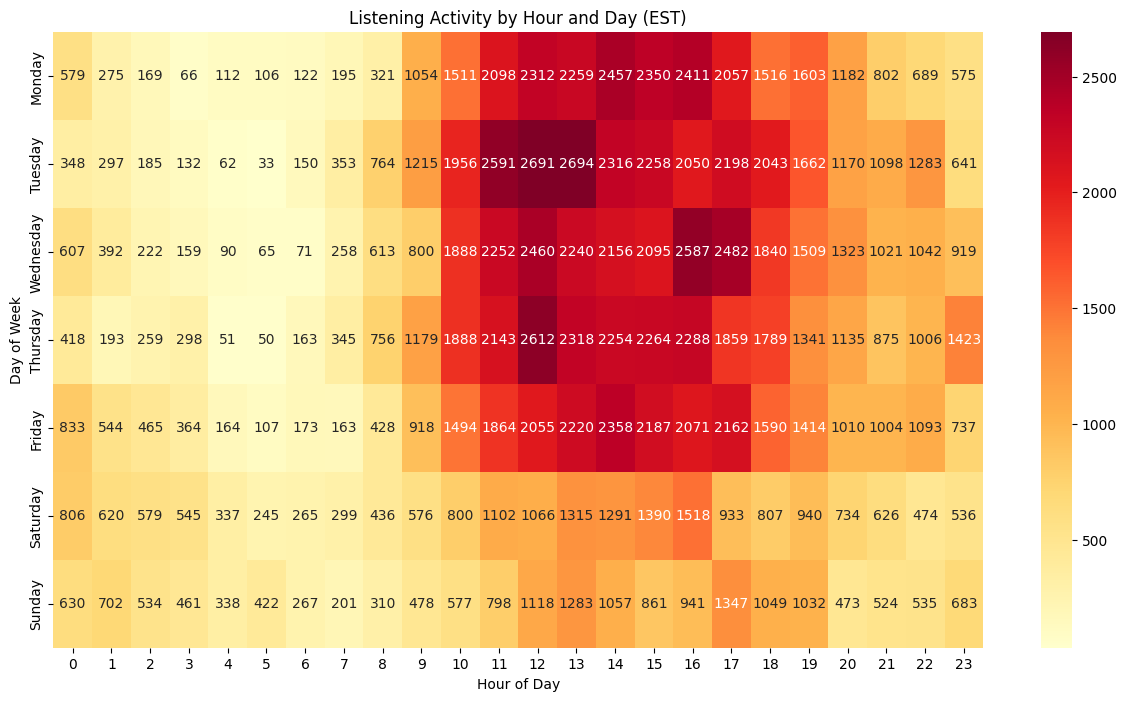

In [23]:
query = """
SELECT 
    CAST(strftime('%w', datetime(ts, '-5 hours')) AS INTEGER) as day_num,
    CAST(strftime('%H', datetime(ts, '-5 hours')) AS INTEGER) as hour,
    COUNT(*) as play_count
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY day_num, hour
ORDER BY day_num, hour;
"""

df = pd.read_sql_query(query, conn)
days = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df['day'] = df['day_num'].map(days)
pivot_table = df.pivot(index='day', columns='hour', values='play_count')
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Listening Activity by Hour and Day (EST)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

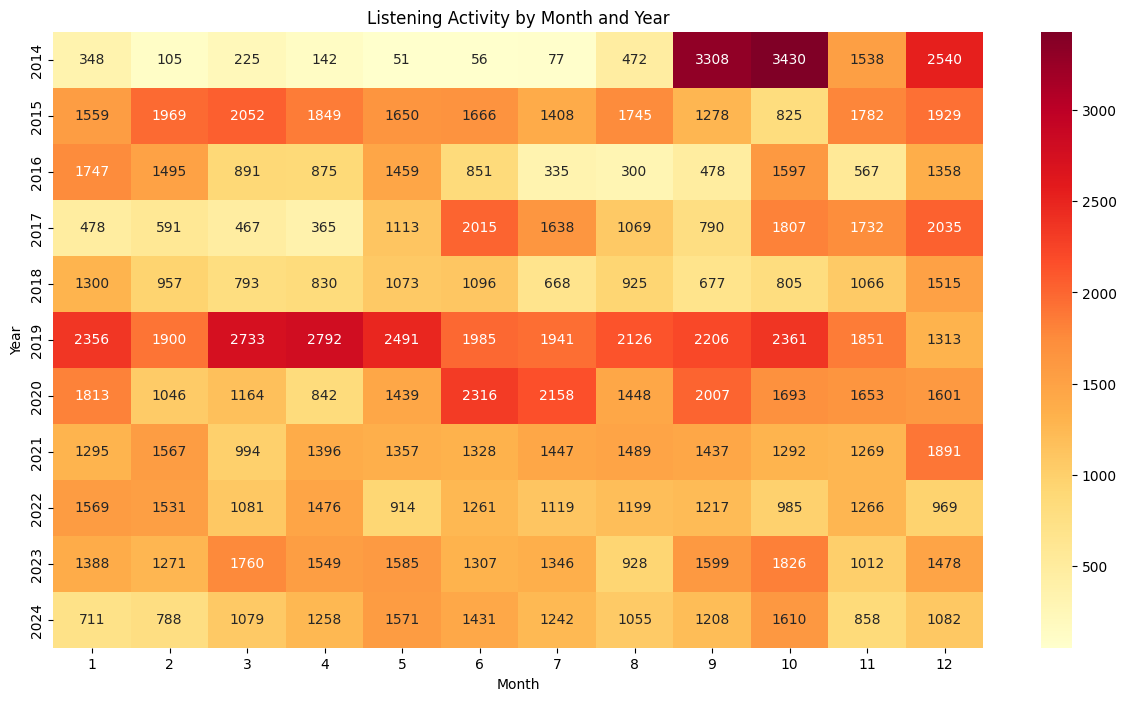

In [24]:
query = """
SELECT 
    year,
    month,
    COUNT(*) as play_count
FROM listening_history
WHERE year > 2013 AND year < 2025
GROUP BY year, month
ORDER BY year, month;
"""

df = pd.read_sql_query(query, conn)
pivot_table = df.pivot(index='year', columns='month', values='play_count')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Listening Activity by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

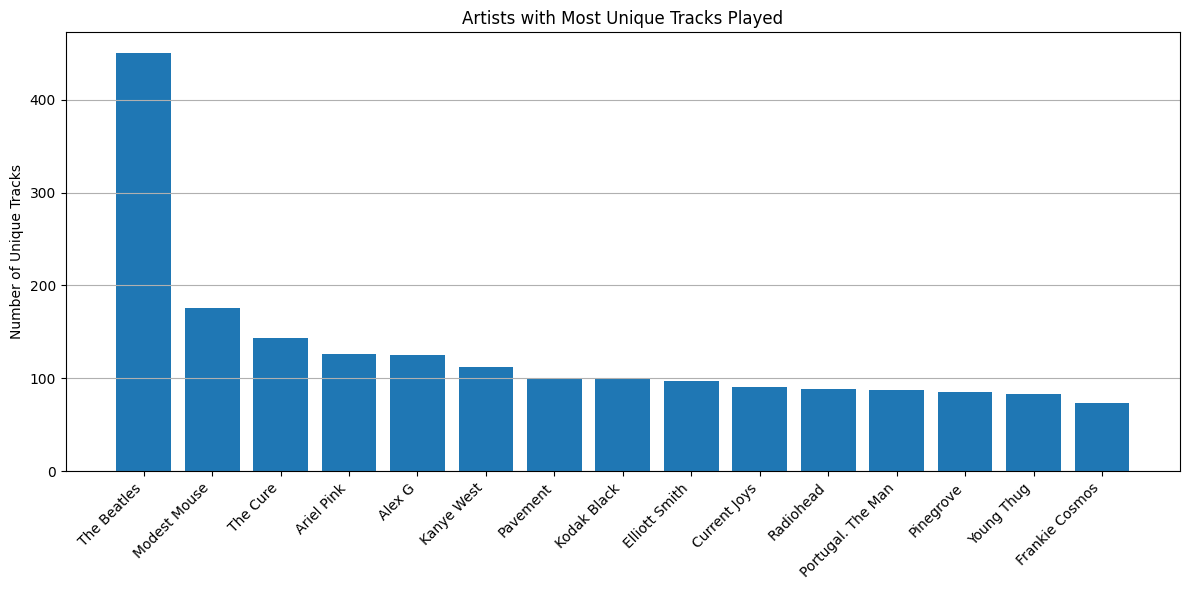

In [25]:
query = """
SELECT 
   master_metadata_album_artist_name as artist,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
   COUNT(*) as total_plays
FROM listening_history
WHERE master_metadata_album_artist_name IS NOT NULL
   AND master_metadata_album_artist_name != '8 Bit Universe'
GROUP BY artist
ORDER BY unique_tracks DESC
LIMIT 15;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.bar(range(len(df)), df['unique_tracks'])
plt.xticks(range(len(df)), df['artist'], rotation=45, ha='right')
plt.title('Artists with Most Unique Tracks Played')
plt.ylabel('Number of Unique Tracks')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

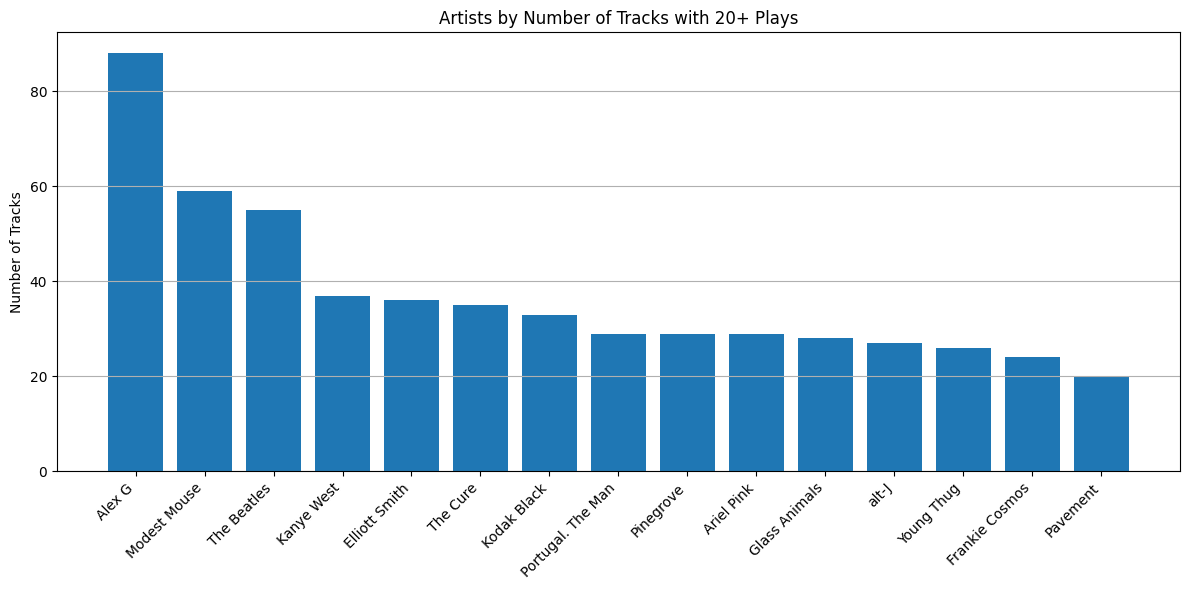

In [26]:
query = """
WITH track_counts AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       master_metadata_track_name as track,
       COUNT(*) as play_count
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
   GROUP BY artist, track
   HAVING play_count >= 20
)
SELECT 
   artist,
   COUNT(*) as tracks_over_20_plays,
   SUM(play_count) as total_plays
FROM track_counts
GROUP BY artist
ORDER BY tracks_over_20_plays DESC
LIMIT 15;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.bar(range(len(df)), df['tracks_over_20_plays'])
plt.xticks(range(len(df)), df['artist'], rotation=45, ha='right')
plt.title('Artists by Number of Tracks with 20+ Plays')
plt.ylabel('Number of Tracks')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

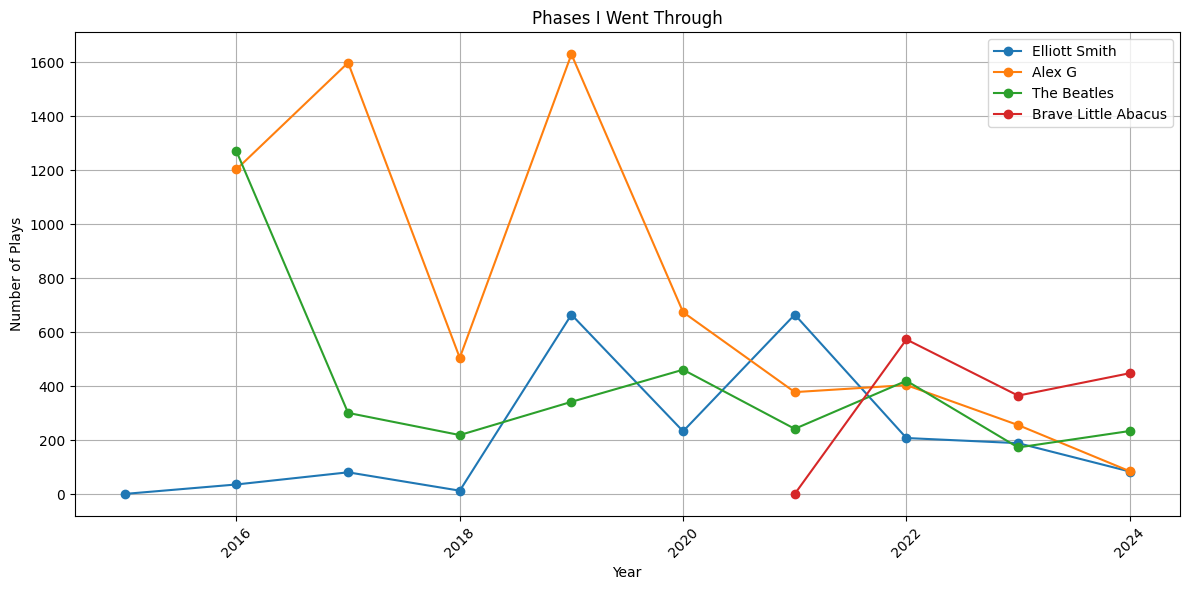

In [49]:
query = """
WITH artist_counts AS (
   SELECT 
       year,
       master_metadata_album_artist_name,
       COUNT(*) as plays
   FROM listening_history 
   WHERE year > 2013 AND year < 2025
   GROUP BY year, master_metadata_album_artist_name
)
SELECT year, master_metadata_album_artist_name, plays
FROM artist_counts
WHERE master_metadata_album_artist_name IN (
   SELECT master_metadata_album_artist_name 
   FROM listening_history
   WHERE master_metadata_album_artist_name = 'The Beatles' OR
       master_metadata_album_artist_name = 'Elliott Smith' OR
       master_metadata_album_artist_name = 'Brave Little Abacus' OR
       master_metadata_album_artist_name = 'Alex G'
   GROUP BY master_metadata_album_artist_name
   ORDER BY COUNT(*) DESC
)
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for artist in df['master_metadata_album_artist_name'].unique():
   artist_data = df[df['master_metadata_album_artist_name'] == artist]
   plt.plot(artist_data['year'], artist_data['plays'], marker='o', label=artist)

plt.title('Phases I Went Through')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

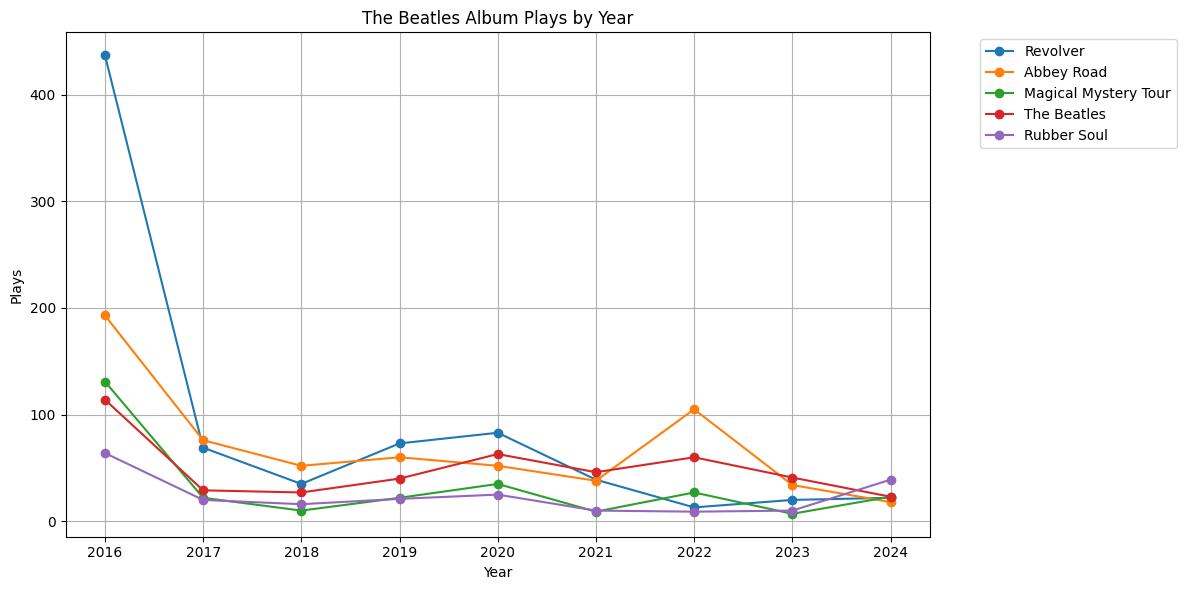

In [28]:
query = """
SELECT 
   master_metadata_album_album_name as album,
   year,
   COUNT(*) as plays
FROM listening_history
WHERE master_metadata_album_artist_name = 'The Beatles'
   AND master_metadata_album_album_name IN (
       SELECT master_metadata_album_album_name
       FROM listening_history
       WHERE master_metadata_album_artist_name = 'The Beatles'
       GROUP BY master_metadata_album_album_name
       ORDER BY COUNT(*) DESC
       LIMIT 5
   )
   AND year > 2013 AND year < 2025
GROUP BY album, year
ORDER BY year, plays DESC;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
for album in df['album'].unique():
   album_data = df[df['album'] == album]
   plt.plot(album_data['year'], album_data['plays'], marker='o', label=album)

plt.title('The Beatles Album Plays by Year')
plt.xlabel('Year')
plt.ylabel('Plays')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
query = """
SELECT 
   master_metadata_album_album_name as album,
   COUNT(*) as total_plays,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
   ROUND(AVG(minutes_played), 2) as avg_minutes_per_play
FROM listening_history
WHERE master_metadata_album_artist_name = 'The Beatles'
GROUP BY album
ORDER BY total_plays DESC
LIMIT 10;
"""

df = pd.read_sql_query(query, conn)
print(df.to_string(index=False))

                                album  total_plays  unique_tracks  avg_minutes_per_play
                             Revolver          792             18                  1.64
                           Abbey Road          628             21                  1.72
                          The Beatles          443             58                  1.95
                 Magical Mystery Tour          286             11                  2.27
                          Rubber Soul          214             14                  1.77
Sgt. Pepper's Lonely Hearts Club Band          186             28                  2.07
                            Let It Be          176             16                  1.52
                                Help!          153             14                  1.63
                          Anthology 2          111             38                  1.83
                          Anthology 1           99             48                  1.91


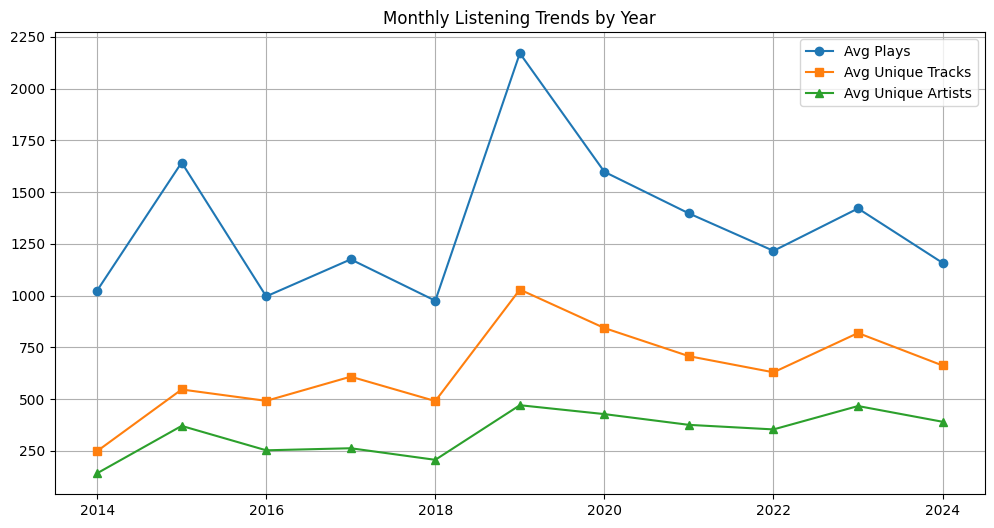

In [30]:
query = """
WITH monthly_stats AS (
    SELECT 
        year,
        month,
        COUNT(DISTINCT master_metadata_album_artist_name) as unique_artists,
        COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
        COUNT(*) as total_plays
    FROM listening_history
    WHERE year > 2013 AND year < 2025
    GROUP BY year, month
)
SELECT 
    year,
    ROUND(AVG(unique_artists)) as avg_artists_per_month,
    ROUND(AVG(unique_tracks)) as avg_tracks_per_month,
    ROUND(AVG(total_plays)) as avg_plays_per_month
FROM monthly_stats
GROUP BY year
ORDER BY year;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['avg_plays_per_month'], marker='o', label='Avg Plays')
plt.plot(df['year'], df['avg_tracks_per_month'], marker='s', label='Avg Unique Tracks')
plt.plot(df['year'], df['avg_artists_per_month'], marker='^', label='Avg Unique Artists')
plt.title('Monthly Listening Trends by Year')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

query = """
WITH artist_metrics AS (
   SELECT 
       master_metadata_album_artist_name as artist,
       COUNT(*) as total_plays,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
       COUNT(DISTINCT strftime('%Y-%m', ts)) as active_months,
       MAX(ts) as last_played
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
       AND master_metadata_album_artist_name != 'Various Artists'
   GROUP BY artist
   HAVING total_plays >= 100
)
SELECT 
   artist,
   total_plays,
   unique_tracks,
   active_months,
   ROUND(CAST(total_plays AS FLOAT) / active_months, 2) as plays_per_month
FROM artist_metrics
ORDER BY plays_per_month DESC
LIMIT 10;
"""

print('\nMost Consistently Played Artists')
df = pd.read_sql_query(query, conn)
df


Most Consistently Played Artists


,artist,total_plays,unique_tracks,active_months,plays_per_month
0,Alex G,6736,125,108,62.37
1,Modest Mouse,4034,176,92,43.85
2,Brave Little Abacus,1429,26,34,42.03
3,Charli xcx,272,27,8,34.00
4,The Beatles,3664,450,109,33.61
5,Imagine Dragons,333,17,11,30.27
6,Pinegrove,2423,85,84,28.85
7,The Cure,2378,144,92,25.85
8,Ariel Pink,1983,126,78,25.42
9,Elliott Smith,2220,97,95,23.37


In [32]:
query = """
SELECT 
   master_metadata_album_album_name as album,
   master_metadata_album_artist_name as artist,
   COUNT(*) as total_plays,
   COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
   ROUND(AVG(minutes_played), 2) as avg_minutes_per_play,
   ROUND(SUM(minutes_played), 2) as total_minutes
FROM listening_history
WHERE master_metadata_album_album_name IS NOT NULL
   AND master_metadata_album_artist_name != 'Various Artists'
GROUP BY album, artist
ORDER BY total_plays DESC
LIMIT 20;
"""

print('\nTop Albums by Total Plays')
df = pd.read_sql_query(query, conn)
df


Top Albums by Total Plays


,album,artist,total_plays,unique_tracks,avg_minutes_per_play,total_minutes
0,Trick,Alex G,1248,19,1.72,2145.85
1,DSU,Alex G,1220,15,1.95,2373.86
2,Just Got Back from the Discomfort We're Alright,Brave Little Abacus,1207,12,3.46,4178.91
3,Everything so Far,Pinegrove,1200,21,2.27,2726.71
4,Beach Music,Alex G,1137,13,1.89,2149.44
5,Rules,Alex G,1125,15,2.03,2287.72
6,The Lonesome Crowded West,Modest Mouse,929,20,4.17,3874.82
7,ZABA,Glass Animals,887,15,2.16,1912.12
8,In the Aeroplane Over the Sea,Neutral Milk Hotel,861,11,2.56,2205.74
9,Holo Pleasures / California Dreamin',Elvis Depressedly,800,12,1.40,1117.59


In [33]:
query = """
SELECT 
   master_metadata_album_artist_name as artist,
   COUNT(*) as total_plays,
   ROUND(AVG(minutes_played), 2) as avg_minutes,
   ROUND(SUM(minutes_played), 2) as total_minutes
FROM listening_history
WHERE master_metadata_album_artist_name IS NOT NULL
   AND master_metadata_album_artist_name != 'Various Artists'
GROUP BY artist
HAVING total_plays >= 50
ORDER BY avg_minutes DESC
LIMIT 15;
"""

print('\nArists with Highest Average Minutes per Stream')
df = pd.read_sql_query(query, conn)
df


Arists with Highest Average Minutes per Stream


,artist,total_plays,avg_minutes,total_minutes
0,Godspeed You! Black Emperor,197,10.17,2003.42
1,Silver Mt. Zion,155,6.12,948.99
2,Indian Summer,68,5.85,397.73
3,"Black Country, New Road",404,5.27,2129.62
4,Bark Psychosis,146,5.24,765.46
5,Have A Nice Life,159,5.23,831.21
6,Boris,65,5.23,339.63
7,Slint,206,5.12,1055.08
8,Red House Painters,235,5.11,1200.47
9,Parannoul,257,5.04,1294.30


In [34]:
query = """
WITH track_lengths AS (
    SELECT 
        master_metadata_track_name,
        MAX(minutes_played) as track_length
    FROM listening_history
    GROUP BY master_metadata_track_name
)
SELECT 
    h.master_metadata_album_artist_name as artist,
    COUNT(*) as total_plays,
    ROUND(AVG(h.minutes_played), 2) as avg_minutes_played,
    ROUND(AVG(h.minutes_played / t.track_length * 100), 2) as completion_percentage
FROM listening_history h
JOIN track_lengths t ON h.master_metadata_track_name = t.master_metadata_track_name
WHERE h.master_metadata_album_artist_name IS NOT NULL
    AND h.master_metadata_album_artist_name != 'Various Artists'
GROUP BY h.master_metadata_album_artist_name
HAVING total_plays >= 50
ORDER BY completion_percentage DESC
LIMIT 15;
"""

print('\nArtists with the Highest Song Completion Rates')
df = pd.read_sql_query(query, conn)
df


Artists with the Highest Song Completion Rates


,artist,total_plays,avg_minutes_played,completion_percentage
0,Julie Doiron,69,1.87,91.61
1,Beyoncé,89,2.85,90.97
2,La Dispute,85,3.37,90.12
3,Boards of Canada,59,2.32,89.66
4,Even As We Speak,106,2.46,89.39
5,Failure,82,4.01,88.31
6,Mates of State,66,3.01,87.47
7,Midlake,59,4.10,87.33
8,Piebald,99,3.01,86.99
9,Merchant Ships,74,2.62,86.82


In [35]:
query = """
WITH track_lengths AS (
    SELECT 
        master_metadata_track_name,
        MAX(minutes_played) as track_length
    FROM listening_history
    GROUP BY master_metadata_track_name
)
SELECT 
    h.master_metadata_album_artist_name as artist,
    COUNT(*) as total_plays,
    ROUND(AVG(h.minutes_played), 2) as avg_minutes_played,
    ROUND(AVG(h.minutes_played / t.track_length * 100), 2) as completion_percentage
FROM listening_history h
JOIN track_lengths t ON h.master_metadata_track_name = t.master_metadata_track_name
WHERE h.master_metadata_album_artist_name IS NOT NULL
    AND h.master_metadata_album_artist_name != 'Various Artists'
GROUP BY h.master_metadata_album_artist_name
HAVING total_plays >= 150
ORDER BY completion_percentage ASC
LIMIT 15;
"""

print('\nArtists with the Lowest Song Completion Rates')
df = pd.read_sql_query(query, conn)
df


Artists with the Lowest Song Completion Rates


,artist,total_plays,avg_minutes_played,completion_percentage
0,NxWorries,366,0.61,22.27
1,Kodaline,170,1.27,25.98
2,Mac Miller,150,0.96,26.91
3,Kanye West,1522,1.07,28.11
4,Anderson .Paak,360,1.38,31.20
5,J. Cole,183,0.98,31.43
6,Vetiver,227,1.27,34.79
7,My Morning Jacket,160,2.14,35.30
8,Nas,432,1.28,35.60
9,A$AP Rocky,161,0.98,35.73


In [36]:
query = """
WITH daily_artist_plays AS (
   SELECT 
       date(ts, '-5 hours') as play_date,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays_in_day,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
       AND master_metadata_album_artist_name != '8 Bit Universe'
   GROUP BY play_date, artist
   ORDER BY plays_in_day DESC
)
SELECT 
   artist,
   play_date,
   plays_in_day,
   unique_tracks
FROM daily_artist_plays
ORDER BY plays_in_day DESC
LIMIT 15;
"""
print('\nTop Played Arists in a Single Day')
df = pd.read_sql_query(query, conn)
df


Top Played Arists in a Single Day


,artist,play_date,plays_in_day,unique_tracks
0,The Beatles,2016-02-21,191,21
1,Ariel Pink,2019-05-26,149,23
2,Brave Little Abacus,2024-12-24,148,12
3,Current Joys,2018-02-18,141,11
4,Modest Mouse,2022-04-26,91,84
5,Alex G,2017-09-23,89,60
6,Alex G,2019-02-08,79,72
7,The Cure,2019-05-03,73,31
8,Alex G,2016-12-14,72,57
9,Alex G,2017-05-08,72,50


In [37]:
query = """
WITH weekly_artist_plays AS (
   SELECT 
       strftime('%Y-%W', date(ts, '-5 hours')) as week,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays_in_week,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
       AND master_metadata_album_artist_name != '8 Bit Universe'
   GROUP BY week, artist
   ORDER BY plays_in_week DESC
)
SELECT 
   artist,
   week,
   plays_in_week,
   unique_tracks
FROM weekly_artist_plays
ORDER BY plays_in_week DESC
LIMIT 15;
"""
print('\nTop Played Aritsts in a Single Week')
df = pd.read_sql_query(query, conn)
df


Top Played Aritsts in a Single Week


,artist,week,plays_in_week,unique_tracks
0,The Beatles,2016-07,317,48
1,Ariel Pink,2019-20,297,28
2,Ariel Pink,2019-21,204,55
3,The Cure,2019-17,189,52
4,Current Joys,2018-07,168,20
5,Ariel Pink,2019-22,163,53
6,Brave Little Abacus,2024-52,162,13
7,The Beatles,2016-14,137,108
8,Modest Mouse,2022-17,137,89
9,Pinegrove,2018-32,134,26


In [38]:
query = """
WITH weekly_album_plays AS (
   SELECT 
       strftime('%Y-%W', date(ts, '-5 hours')) as week,
       master_metadata_album_album_name as album,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays_in_week,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
       ROUND(SUM(minutes_played), 2) as total_minutes
   FROM listening_history
   WHERE master_metadata_album_album_name IS NOT NULL
       AND master_metadata_album_artist_name != '8 Bit Universe'
   GROUP BY week, album, artist
   HAVING unique_tracks > 4
)
SELECT 
   album,
   artist,
   week,
   plays_in_week,
   unique_tracks,
   total_minutes
FROM weekly_album_plays
ORDER BY plays_in_week DESC
LIMIT 15;
"""

print('\nTop Played Albums in a Single Week')
df = pd.read_sql_query(query, conn)
df


Top Played Albums in a Single Week


,album,artist,week,plays_in_week,unique_tracks,total_minutes
0,Revolver,The Beatles,2016-07,214,14,515.06
1,Just Got Back from the Discomfort We're Alright,Brave Little Abacus,2024-52,161,12,583.28
2,Seventeen Seconds,The Cure,2019-17,133,22,314.37
3,Everything so Far,Pinegrove,2018-32,128,21,203.27
4,pom pom,Ariel Pink,2019-20,100,8,288.02
5,House of Sugar,Alex G,2019-37,93,13,213.13
6,House of Sugar,Alex G,2019-36,89,13,198.12
7,Everything so Far,Pinegrove,2019-45,89,21,221.40
8,Rules,Alex G,2017-43,75,13,147.81
9,Everything so Far,Pinegrove,2019-42,74,21,214.03


In [39]:
query = """
WITH play_counts AS (
   SELECT 
       master_metadata_track_name as track,
       master_metadata_album_artist_name as artist,
       COUNT(*) as total_plays,
       MAX(ts) as last_played,
       JULIANDAY('2025-01-24') - JULIANDAY(MAX(ts)) as days_since_last_play
   FROM listening_history
   GROUP BY track, artist
   HAVING total_plays >= 125
)
SELECT 
   track,
   artist,
   total_plays,
   last_played,
   ROUND(days_since_last_play) as days_since_last_play
FROM play_counts
ORDER BY days_since_last_play DESC
LIMIT 15;
"""

print("\nSongs I like, but haven't listened to in a while")
df = pd.read_sql_query(query, conn)
df


Songs I like, but haven't listened to in a while


,track,artist,total_plays,last_played,days_since_last_play
0,Round And Round,Ariel Pink,129,2020-10-24 05:11:56+00:00,1553.0
1,New Slang,The Shins,166,2021-07-22 20:48:10+00:00,1281.0
2,Abandon,French Kicks,162,2021-11-28 15:27:08+00:00,1152.0
3,Black River Killer,Blitzen Trapper,133,2022-03-02 22:15:49+00:00,1058.0
4,Class Historian,BRONCHO,126,2022-07-12 19:57:23+00:00,926.0
5,Put a Light On,Generationals,131,2023-07-09 22:56:05+00:00,564.0
6,Wakin on a Pretty Day,Kurt Vile,149,2023-07-09 18:44:33+00:00,564.0
7,The Skin of My Yellow Country Teeth,Clap Your Hands Say Yeah,192,2023-08-10 16:51:39+00:00,532.0
8,After Ur Gone,Alex G,127,2023-09-13 20:54:03+00:00,498.0
9,Girl Called Alex,Kurt Vile,189,2023-10-17 22:54:35+00:00,464.0


In [40]:
query = """
WITH tracks_over_100 AS (
   SELECT 
       master_metadata_track_name as track,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays
   FROM listening_history
   WHERE master_metadata_album_artist_name != 'Easy Star All-Stars'
   GROUP BY track, artist
   HAVING plays >= 50
)
SELECT 
   t1.track,
   t1.artist as artist1,
   t2.artist as artist2,
   t1.plays as plays1,
   t2.plays as plays2
FROM tracks_over_100 t1
JOIN tracks_over_100 t2 
   ON t1.track = t2.track 
   AND t1.artist < t2.artist
ORDER BY t1.plays + t2.plays DESC;
"""

print('\nMost Played Songs with Similar Names')
df = pd.read_sql_query(query, conn)
df


Most Played Songs with Similar Names


,track,artist1,artist2,plays1,plays2
0,The Suburbs,Arcade Fire,Mr Little Jeans,90,125
1,At Home,Crystal Fighters,Slow Pulp,160,50
2,Boy,Alex G,Ra Ra Riot,87,122
3,Kids,Current Joys,Lady Danville,123,67
4,West Coast,Coconut Records,FIDLAR,94,90
5,Youth,Daughter,Glass Animals,104,65
6,Truth,Alex Ebert,The Cry,86,70
7,Days,Pinegrove,The Drums,57,92
8,Young,Air Review,Frankie Cosmos,85,63
9,Intro,Alex G,alt-J,64,82


In [41]:
query = """
WITH yearly_albums AS (
   SELECT 
       year,
       master_metadata_album_album_name as album,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
       ROUND(SUM(minutes_played), 2) as total_minutes,
       ROW_NUMBER() OVER (PARTITION BY year ORDER BY COUNT(*) DESC) as rank
   FROM listening_history
   WHERE year > 2013 AND year < 2025
       AND master_metadata_album_album_name IS NOT NULL
       AND master_metadata_album_artist_name != 'Various Artists'
   GROUP BY year, album, artist
   HAVING unique_tracks > 4
)
SELECT 
   year,
   album,
   artist,
   plays,
   unique_tracks,
   total_minutes
FROM yearly_albums
WHERE rank = 1
ORDER BY year;
"""

print('\nTop Album for each Year')
df = pd.read_sql_query(query, conn)
df


Top Album for each Year


,year,album,artist,plays,unique_tracks,total_minutes
0,2014,In the Aeroplane Over the Sea,Neutral Milk Hotel,107,11,279.95
1,2015,ZABA,Glass Animals,402,13,1274.34
2,2016,Revolver,The Beatles,437,14,898.33
3,2017,Holo Pleasures / California Dreamin',Elvis Depressedly,543,12,849.34
4,2018,Everything so Far,Pinegrove,467,21,722.56
5,2019,Seventeen Seconds,The Cure,567,25,1621.13
6,2020,1000 gecs,100 gecs,233,11,352.93
7,2021,The Lonesome Crowded West,Modest Mouse,673,20,2798.04
8,2022,Just Got Back from the Discomfort We're Alright,Brave Little Abacus,488,12,1689.53
9,2023,Just Got Back from the Discomfort We're Alright,Brave Little Abacus,309,12,1099.67


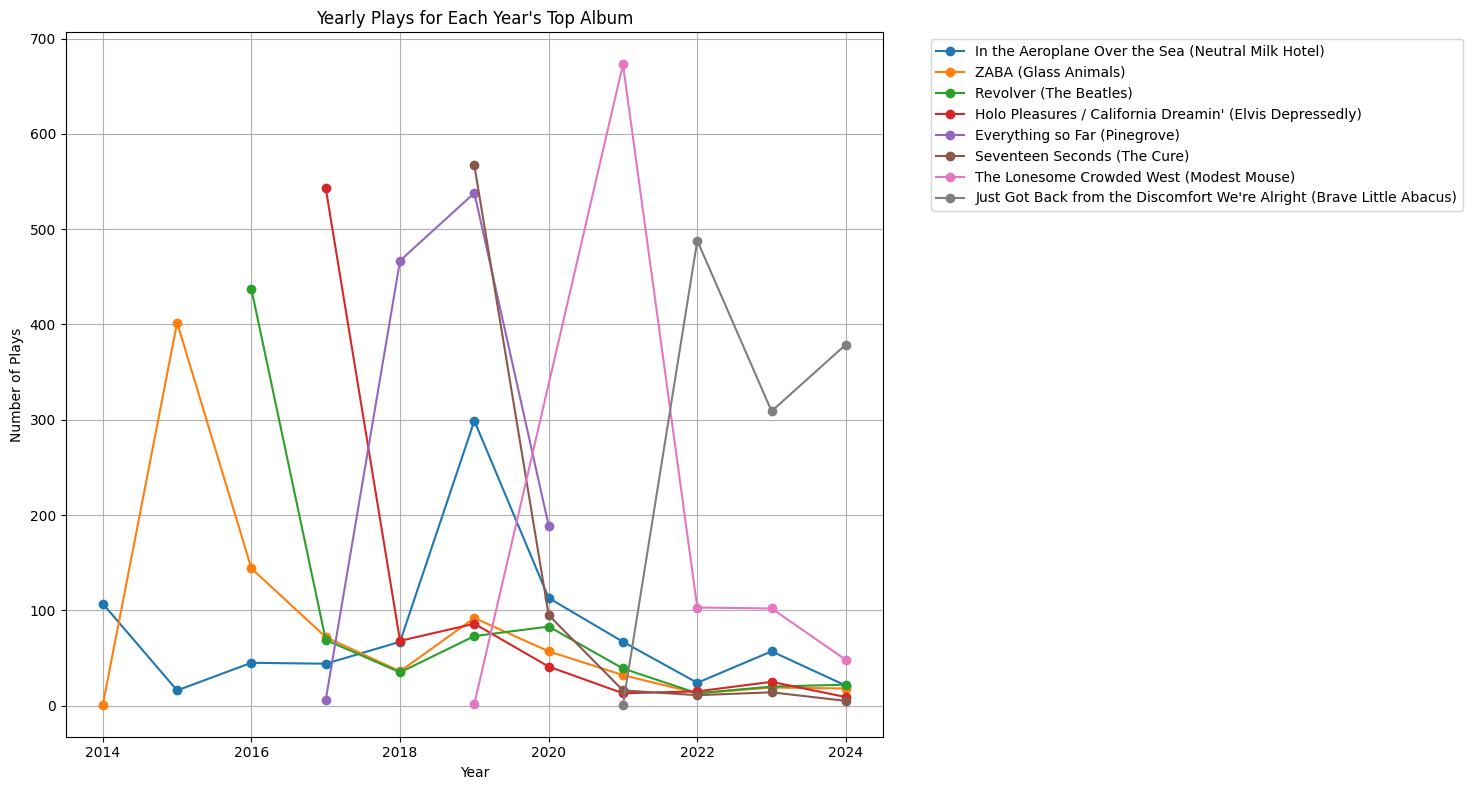

In [42]:
query = """
WITH top_albums AS (
   SELECT DISTINCT album, artist
   FROM (
       SELECT 
           year,
           master_metadata_album_album_name as album,
           master_metadata_album_artist_name as artist,
           COUNT(*) as plays,
           ROW_NUMBER() OVER (PARTITION BY year ORDER BY COUNT(*) DESC) as rank
       FROM listening_history
       WHERE year > 2013 AND year < 2025
           AND master_metadata_album_album_name IS NOT NULL
           AND master_metadata_album_artist_name != 'Various Artists'
       GROUP BY year, album, artist
       HAVING COUNT(DISTINCT master_metadata_track_name) > 4
   )
   WHERE rank = 1
),
yearly_plays AS (
   SELECT 
       year,
       master_metadata_album_album_name as album,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays
   FROM listening_history
   WHERE (master_metadata_album_album_name, master_metadata_album_artist_name) IN (
       SELECT album, artist FROM top_albums
   )
   AND album is not "1"
   AND album is not "Good News For People Who Love Bad News"
   AND album is not "1000 gecs"
   AND year > 2013 AND year < 2025
   GROUP BY year, album, artist
)
SELECT * FROM yearly_plays
ORDER BY year, plays DESC;
"""

df = pd.read_sql_query(query, conn)

plt.figure(figsize=(15, 8))
for album in df['album'].unique():
   album_data = df[df['album'] == album]
   plt.plot(album_data['year'], album_data['plays'], marker='o', label=f"{album} ({album_data['artist'].iloc[0]})")

plt.title('Yearly Plays for Each Year\'s Top Album')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
query = """
WITH monthly_albums AS (
   SELECT 
       strftime('%Y-%m', ts) as month,
       master_metadata_album_album_name as album,
       master_metadata_album_artist_name as artist,
       COUNT(*) as plays,
       COUNT(DISTINCT master_metadata_track_name) as unique_tracks,
       ROW_NUMBER() OVER (PARTITION BY strftime('%Y-%m', ts) ORDER BY COUNT(*) DESC) as rank
   FROM listening_history
   WHERE master_metadata_album_album_name IS NOT NULL
       AND master_metadata_album_artist_name != 'Various Artists'
   GROUP BY month, album, artist
   HAVING unique_tracks > 4
)
SELECT 
   album,
   artist,
   COUNT(*) as times_top_album,
   MAX(plays) as highest_monthly_plays
FROM monthly_albums
WHERE rank = 1
GROUP BY album, artist
ORDER BY times_top_album DESC
LIMIT 10;
"""

print('\nAlbum of the Month Score Sheet')
df = pd.read_sql_query(query, conn)
df


Album of the Month Score Sheet


,album,artist,times_top_album,highest_monthly_plays
0,Just Got Back from the Discomfort We're Alright,Brave Little Abacus,8,260
1,An Awesome Wave,alt-J,6,138
2,Everything so Far,Pinegrove,6,247
3,Evil Friends,Portugal. The Man,4,179
4,Gorilla Manor,Local Natives,4,75
5,Trick,Alex G,4,255
6,Building Nothing Out of Something,Modest Mouse,3,102
7,Hospice,The Antlers,3,106
8,Next Thing,Frankie Cosmos,3,90
9,1000 gecs,100 gecs,2,36


In [44]:
query = """
WITH monthly_totals AS (
   SELECT 
       strftime('%Y-%m', ts) as snapshot_month,
       master_metadata_album_artist_name as artist,
       COUNT(*) as total_plays
   FROM listening_history
   WHERE master_metadata_album_artist_name IS NOT NULL
       AND master_metadata_album_artist_name != 'Various Artists'
       AND year > 2013 AND year < 2025
   GROUP BY snapshot_month, artist
),
cumulative AS (
   SELECT 
       m1.snapshot_month,
       m1.artist,
       SUM(m2.total_plays) as all_time_plays
   FROM monthly_totals m1
   JOIN monthly_totals m2 
       ON m2.snapshot_month <= m1.snapshot_month 
       AND m1.artist = m2.artist
   GROUP BY m1.snapshot_month, m1.artist
)
SELECT * FROM cumulative
ORDER BY snapshot_month, all_time_plays DESC;
"""

df = pd.read_sql_query(query, conn)
pivot_df = df.pivot(index='artist', columns='snapshot_month', values='all_time_plays')
pivot_df.to_csv('christian_alltime_totals.csv')